In [22]:
%load_ext autoreload
%autoreload 2

from mcmc import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Basic 10 nodes susceptibility and TE

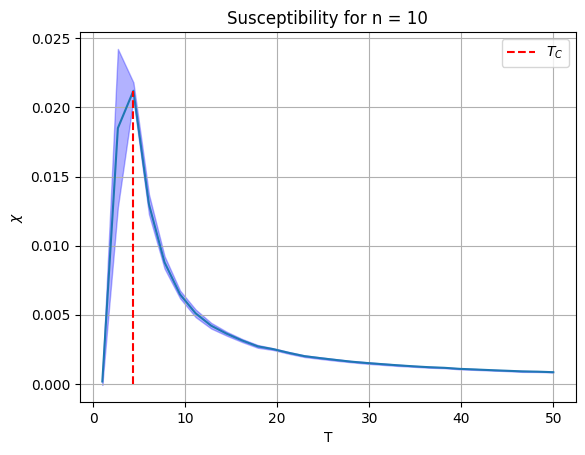

In [4]:
# Run simulation for 10 node network
n = 10
temperatures = np.linspace(1, 50, 30)
sim_data = run_simulation(15, 5000, temperatures, n)
idx = np.argmax(sim_data[2])
tc = temperatures[idx]

# Plot results
plt.plot(temperatures, sim_data[2])
lower_bound = np.subtract(sim_data[2], sim_data[3])
upper_bound = np.add(sim_data[2], sim_data[3])
plt.fill_between(temperatures, lower_bound, upper_bound, alpha=0.3, color = 'b')
plt.ylabel(r'$\chi$')
plt.xlabel('T')
plt.title('Susceptibility for n = 10')
plt.grid()
plt.vlines(tc, 0, np.max(sim_data[2]), linestyles='dashed', colors='r', label = r'$T_C$')
plt.legend()
plt.savefig('Results/Sus_basic.png', bbox_inches = 'tight')

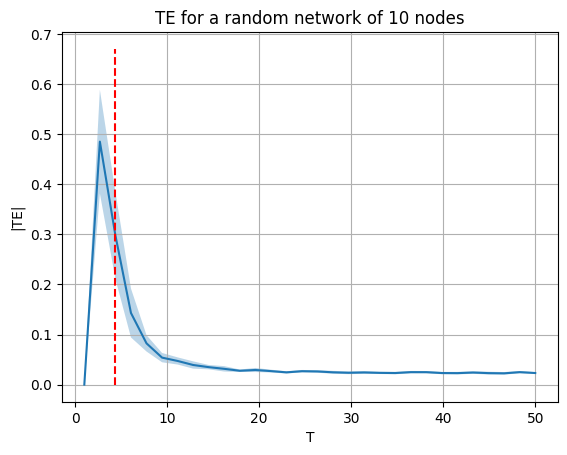

In [42]:
# Set parameters
temperatures = np.linspace(1, 50, 30)
runs = 15
n_iterations = 5000
C = []
C_std = []
multi_sus = []
n = 10

# Calculate TE for network of 10 nodes
for T in temperatures:
    x = np.zeros(runs)
    sus = np.zeros(runs)
    for i in range(0, runs):
        J = conn_matrix_basic(n)
        spins = random_spins(n)        
        _, list_avg_magnetisation, sus[i], spins_timeseries = metropolis(spins, n_iterations, T, J) 
        x[i] = TE(spins_timeseries, J)
    C_std.append(np.std(x))
    C.append(np.abs(np.mean(x)))
    multi_sus.append(np.mean(sus))

# Plot results
tc = temperatures[np.argmax(multi_sus)]
lower_bound = np.subtract(C, C_std)
upper_bound = np.add(C, C_std)
plt.plot(temperatures, C)
plt.fill_between(temperatures, lower_bound, upper_bound, alpha=0.3)

plt.ylabel('|TE|')
plt.xlabel('T')
plt.grid()
plt.title('TE for a random network of 10 nodes')
plt.vlines(tc, 0, 0.67, linestyles='dashed', colors='r')
plt.savefig('Results/10_nodes_TE.png', bbox_inches='tight')

## System size susceptibility and TE

In [36]:
# Set parameters
ns = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
n_iterations = 5000
runs = 15
temperatures = np.linspace(1, 100, 100)

# Create empty lists
tcs = np.zeros(len(ns))
tcs_std = np.zeros(len(ns))
peaks = np.zeros(len(ns))
peaks_std = np.zeros(len(ns))

# Calculate Tc and height of susceptibility peak for different system sizes
for i, n in enumerate(ns): # loop over system sizes
    tc = np.zeros(runs)
    peak = np.zeros(runs)
    for j in range(0, runs):
        sus = np.zeros(len(temperatures))
        for k, T in enumerate(temperatures):
            J = conn_matrix_basic(n)
            spins = random_spins(n)
            spins, avg_magnetisation, sus[k], spins_timeseries = metropolis(spins, n_iterations, T, J)
        idx = np.argmax(sus)
        tc[j] = temperatures[idx]
        peak[j] = sus[idx]

    tcs[i] = np.mean(tc)
    tcs_std[i] = np.std(tc)
    peaks[i] = np.mean(peak)
    peaks_std[i] = np.std(peak)  

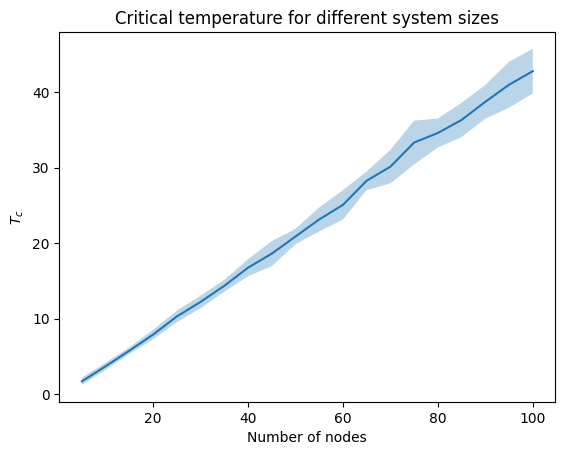

In [38]:
# Plot Tc against system size
lower_bound = np.subtract(tcs, tcs_std)
upper_bound = np.add(tcs, tcs_std)
    
plt.plot(ns, tcs)
plt.fill_between(ns,lower_bound, upper_bound, alpha=0.3)

plt.xlabel('Number of nodes')
plt.ylabel(r'$T_c$')
plt.title('Critical temperature for different system sizes')
plt.savefig('Results/critical_t_system_size.png')

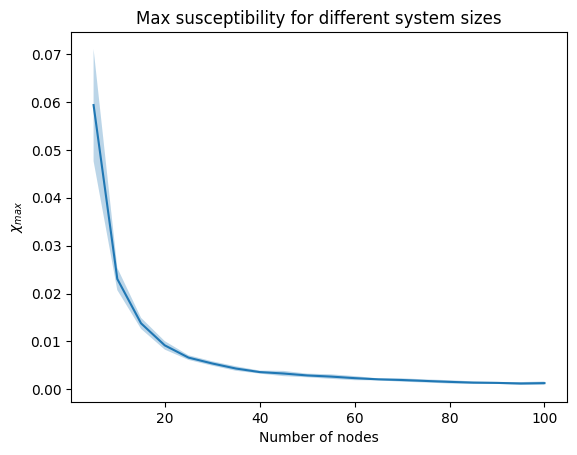

In [39]:
# Plot max susceptibility against system size
lower_bound = np.subtract(peaks, peaks_std)
upper_bound = np.add(peaks, peaks_std)

plt.plot(ns, peaks)
plt.fill_between(ns,lower_bound, upper_bound, alpha=0.3)

plt.xlabel('Number of nodes')
plt.ylabel(r'$\chi_{max}$')
plt.title('Max susceptibility for different system sizes')
plt.savefig('Results/max_sus_system_size.png')

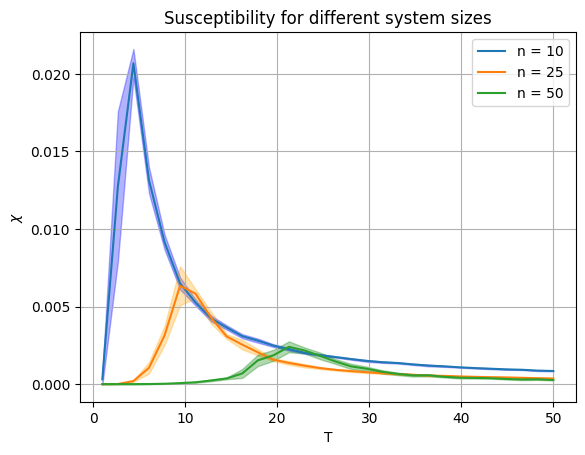

In [7]:
# Calculate susceptibility for different system sizes
ns = [10, 25, 50]
n_iterations = 5000
tcs = np.zeros(len(ns))
temperatures = np.linspace(1, 50, 30)
colors = ['b', 'orange', 'g']

for i, n in enumerate(ns): # loop over different system sizes
    # J = conn_matrix_basic(n)
    sim_data = run_simulation(10, n_iterations, temperatures, n, J)

    # Plot results
    plt.plot(temperatures, sim_data[2], label = 'n = {}'.format(n))
    lower_bound = np.subtract(sim_data[2], sim_data[3])
    upper_bound = np.add(sim_data[2], sim_data[3])
    plt.fill_between(temperatures, lower_bound, upper_bound, alpha=0.3, color = colors[i])
    
plt.ylabel(r'$\chi$')
plt.xlabel('T')
plt.title('Susceptibility for different system sizes')
plt.legend()
plt.grid()
plt.savefig('Results/Sus_system_sizes.png', bbox_inches = 'tight')

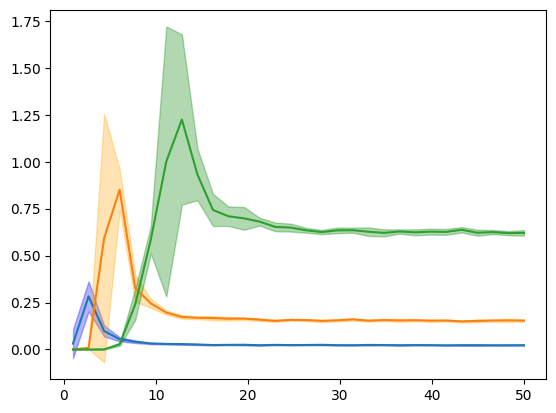

In [24]:
# Calculate TE for diffferent system sizes
ns = [10, 25, 50]
temperatures = np.linspace(1, 50, 30)
runs = 10
n_iterations = 5000
colors = ['b', 'orange', 'g']


for i, n in enumerate(ns): # loop over system sizes

    C = []
    C_std = []

    for T in temperatures: # loop over temperatures
        x = np.zeros(runs)
        sus = np.zeros(runs)

        for j in range(0, runs): # run simulation 10 times
            J = conn_matrix_power(n)
            spins = random_spins(n)        
            _, list_avg_magnetisation, sus[j], spins_timeseries = metropolis(spins, n_iterations, T, J) 
            x[j] = TE(spins_timeseries, J)
        C_std.append(np.std(x))
        C.append(np.abs(np.mean(x)))

    # Plot results
    plt.plot(temperatures, C, label = 'n = {}'.format(n))
    lower_bound = np.subtract(C, C_std)
    upper_bound = np.add(C, C_std)
    plt.fill_between(temperatures, lower_bound, upper_bound, alpha=0.3, color = colors[i])
plt.ylabel('TE')
plt.xlabel('T')
plt.title('TE for different system sizes')
plt.legend()
plt.grid()
plt.savefig('Results/TE_system_sizes.png', bbox_inches = 'tight')    


## Susceptibility and TE for different means

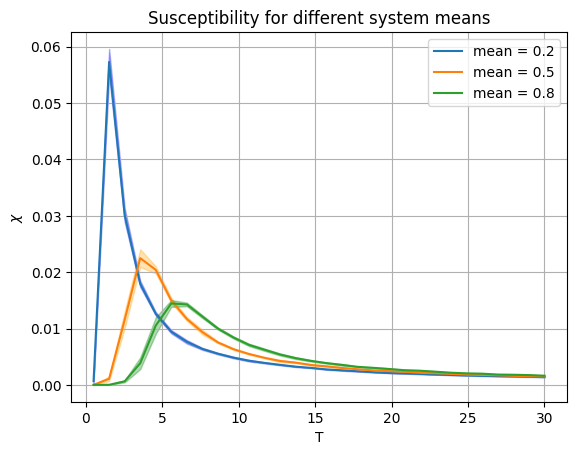

In [23]:
# Calculate susceptibility for different means
mean_list = [0.2, 0.5, 0.8]
temperatures = np.linspace(0.5, 30, 30)
colors = ['b', 'orange', 'g']
n = 10

for i, m in enumerate(mean_list): # loop over different means
    sim_data = run_simulation_diff_connectivity(10, 10000, temperatures, n, c_matrix_arg = m)

    # Plot results
    plt.plot(temperatures, sim_data[2], label = 'mean = {}'.format(m))
    lower_bound = np.subtract(sim_data[2], sim_data[3])
    upper_bound = np.add(sim_data[2], sim_data[3])
    plt.fill_between(temperatures, lower_bound, upper_bound, alpha=0.3, color = colors[i])
    
plt.ylabel(r'$\chi$')
plt.xlabel('T')
plt.title('Susceptibility for different system means')
plt.legend()
plt.grid()
plt.savefig('Results/Sus_means.png', bbox_inches = 'tight')

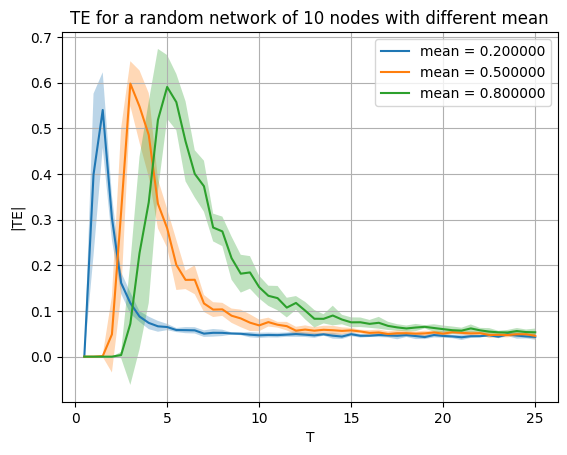

In [15]:
# Calculate TE for different means
mean_list = [0.2, 0.5, 0.8]
temperatures = np.linspace(0.5, 25, 50)
n = 10

for mean in mean_list: # loop over means
    
    J = mean_matrix(mean)
    C= []
    C_std = []
    for T in temperatures: # loop over temperatures
        x = np.zeros(n)
        for i in range(0, n):
            spins = random_spins(n)        
            _, list_avg_magnetisation, list_sus, spins_timeseries = metropolis(spins,5000, T, J) 
            x[i] = TE(spins_timeseries, J)
        C_std.append(np.std(x))
        C.append(np.abs(np.mean(x)))
    lower_bound = np.subtract(C, C_std)
    upper_bound = np.add(C, C_std)
    plt.plot(temperatures, C,  label = "mean = {}".format(mean))
    plt.fill_between(temperatures, lower_bound, upper_bound, alpha=0.3)

# plot results
plt.ylabel('|TE|')
plt.xlabel('T')
plt.grid()
plt.legend()
plt.title('TE for a random network of 10 nodes with different means')
plt.savefig('Results/TE_means.png', bbox_inches='tight')
plt.show()

## Susceptibility and TE for different fraction of zeros

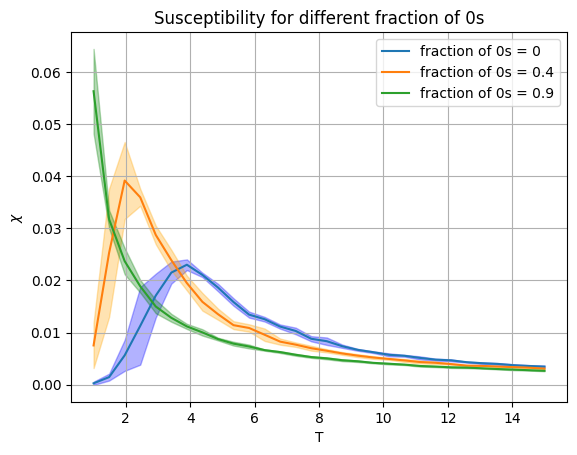

In [30]:
# Calculate susceptibility for different fraction of zeros
n = 10
temperatures = np.linspace(1, 15, 30)
runs = 10
fractions = [0, 0.4, 0.9]
colors = ['b', 'orange', 'g']

for i, f in enumerate(fractions): # loop over different fraction of zeros
    sim_data = run_simulation_diff_connectivity(10, n_iterations, temperatures, n, c_matrix_fun = conn_matrix_fraction_zeros, c_matrix_arg = f)

    # Plot results
    plt.plot(temperatures, sim_data[2], label = 'fraction of 0s = {}'.format(f))
    lower_bound = np.subtract(sim_data[2], sim_data[3])
    upper_bound = np.add(sim_data[2], sim_data[3])
    plt.fill_between(temperatures, lower_bound, upper_bound, alpha=0.3, color = colors[i])
    
plt.ylabel(r'$\chi$')
plt.xlabel('T')
plt.title('Susceptibility for different fraction of 0s')
plt.legend()
plt.grid()
plt.savefig('Results/Sus_zeros.png', bbox_inches = 'tight')

0
0.4
0.9


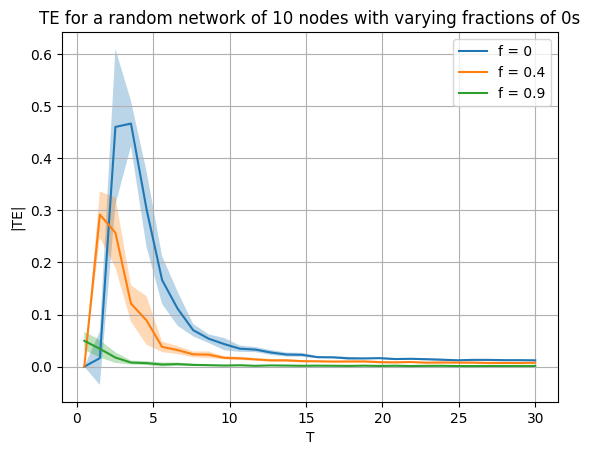

In [24]:
# Calculate TE for different fraction of zeros
n = 10
temperatures = np.linspace(1, 15, 30)
runs = 10
fractions = [0, 0.4, 0.9]
colors = ['b', 'orange', 'g']

for f in fractions: # loop over fraction of 0s
    C = []
    C_std = []
    for T in temperatures: # loop over temperatures
        x = np.zeros(runs)
        for i in range(0, runs):
            J = conn_matrix_fraction_zeros(n, f)
            spins = random_spins(n)        
            _, list_avg_magnetisation, list_sus, spins_timeseries = metropolis(spins, n_iterations, T, J) 
            x[i] = TE(spins_timeseries, J)
        
        C_std.append(np.std(x))
        C.append(np.abs(np.mean(x)))
    # Plot results
    lower_bound = np.subtract(C, C_std)
    upper_bound = np.add(C, C_std)
    plt.plot(temperatures, C, label = f'f = {f}')
    plt.fill_between(temperatures, lower_bound, upper_bound, alpha=0.3)

plt.ylabel('|TE|')
plt.xlabel('T')
plt.grid()
plt.title('TE for a random network of 10 nodes with varying fractions of 0s')
plt.legend()
plt.savefig('Results/TE_zeros', bbox_inches = 'tight')


## Susceptibility and TE for different distributions

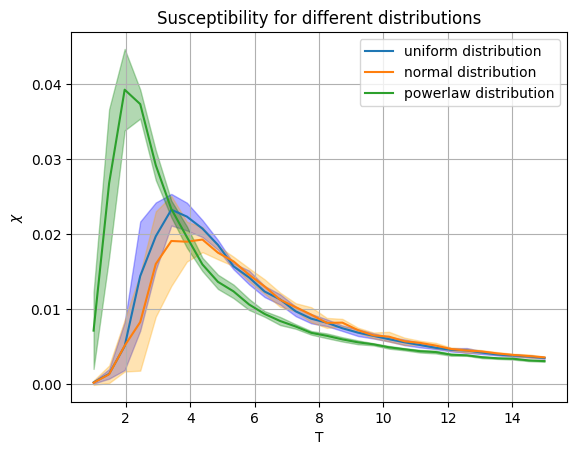

In [32]:
n = 10
temperatures = np.linspace(1, 15, 30)
runs = 10
distributions = [conn_matrix_basic, conn_matrix_norm, conn_matrix_power]
names = ['uniform', 'normal', 'powerlaw']

colors = ['b', 'orange', 'g']

for i, distribution in enumerate(distributions): # loop over different distributions
    sim_data = run_simulation(10, n_iterations, temperatures, n, c_matrix_fun = distribution)

    # Plot results
    plt.plot(temperatures, sim_data[2], label = '{} distribution'.format(names[i]))
    lower_bound = np.subtract(sim_data[2], sim_data[3])
    upper_bound = np.add(sim_data[2], sim_data[3])
    plt.fill_between(temperatures, lower_bound, upper_bound, alpha=0.3, color = colors[i])
    
plt.ylabel(r'$\chi$')
plt.xlabel('T')
plt.title('Susceptibility for different distributions')
plt.legend()
plt.grid()
plt.savefig('Results/Sus_distribution.png', bbox_inches = 'tight')

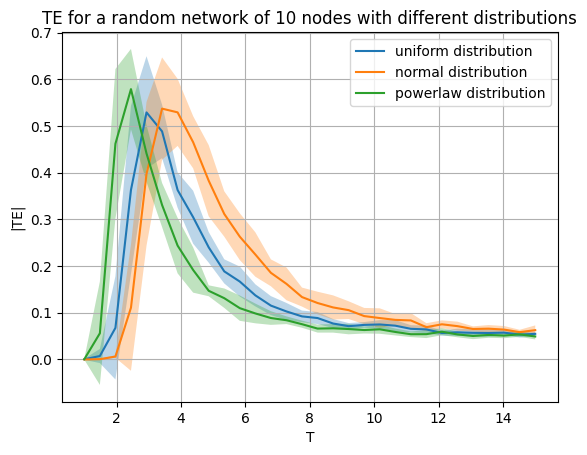

In [35]:
# Calculate TE for different distributions
n = 10
temperatures = np.linspace(1, 15, 30)
runs = 10
distributions = [conn_matrix_basic, conn_matrix_norm, conn_matrix_power]
names = ['uniform', 'normal', 'powerlaw']

for i, distribution in enumerate(distributions): # loop over distributions
    
    J = distribution(n)
    C= []
    C_std = []
    for T in temperatures: # loop over temperatures
        x = np.zeros(n)
        for j in range(0, n):
            spins = random_spins(n)        
            _, list_avg_magnetisation, list_sus, spins_timeseries = metropolis(spins,n_iterations, T, J) 
            x[j] = TE(spins_timeseries, J)
        C_std.append(np.std(x))
        C.append(np.abs(np.mean(x)))
    # plot results
    lower_bound = np.subtract(C, C_std)
    upper_bound = np.add(C, C_std)
    plt.plot(temperatures, C,  label = "{} distribution" .format(names[i]))
    plt.fill_between(temperatures, lower_bound, upper_bound, alpha=0.3)

plt.ylabel('|TE|')
plt.xlabel('T')
plt.grid()
plt.legend()
plt.title('TE for a random network of 10 nodes with different distributions')
plt.savefig('Results/TE_distributions.png', bbox_inches='tight')
plt.show()